In [16]:
import tensorflow as tf 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential,  Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input,BatchNormalization, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU, AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, History, TensorBoard,ModelCheckpoint
import os

In [4]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), strides=(1, 1),padding='same', activation='relu', input_shape=(32, 32, 3)))
#model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(8, kernel_size=(3,3),strides=(2, 2),padding='same', activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size=(3,3),strides=(2, 2), padding='same', activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(56, kernel_size=(3,3),strides=(2, 2), padding='same', activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(Dropout(0.2))



model.add(Flatten())
#model.add(Dense(80,kernel_regularizer = regularizers.l2(0.0001), activation='relu'))
#model.add(Dropout(0.4))
#model.add(Dense(84, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(6))



model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              metrics=['accuracy'])
#model.summary()

**Keras Model PLot**

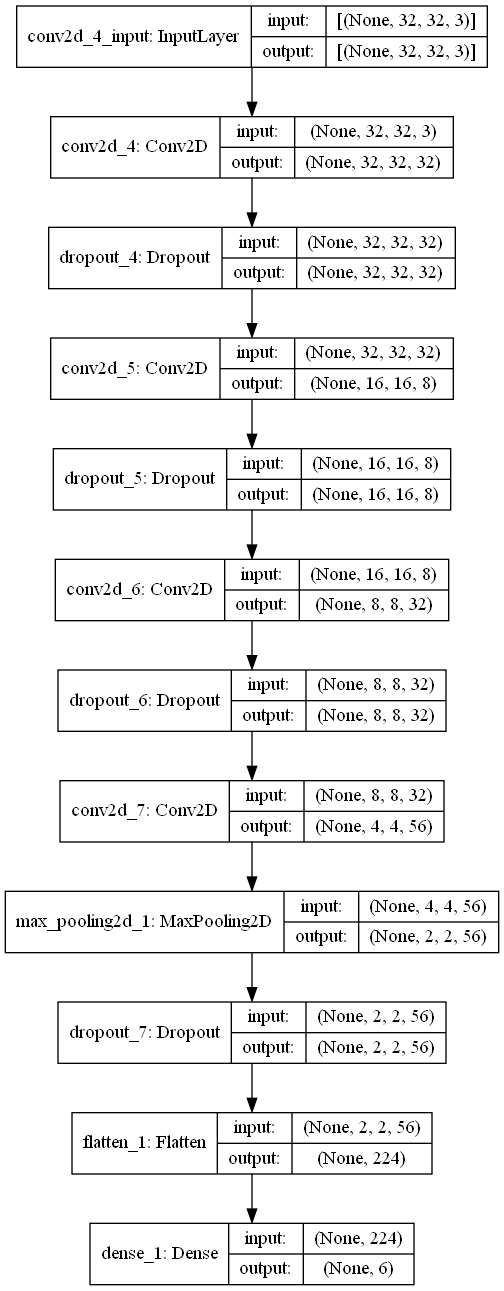

In [5]:
tf.keras.utils.plot_model(
model,
to_file="model.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None
)

**Conver h5 file into a tflite file**

In [3]:
model = tf.keras.models.load_model(r"C:\Users\hpalm\Desktop\Programacion\Proyecto_de_grado\Jupyter\Codigo\Pesos\P01.h5") 

In [8]:
TF_LITE_MODEL_FILE_NAME = "tf_lite_model.tflite"

In [5]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: C:\Users\hpalm\AppData\Local\Temp\tmpg8x0dw22\assets


In [9]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name,"wb").write(tflite_model)

99180

In [13]:


def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

In [11]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [17]:
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")


File size: 96.855 Kilobytes
